<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(0)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.749686,22.530578,-0.210791,124.069474,123.950223,0.119251
1,0.0,1.0,81.927655,90.868231,1.179683,183.975569,183.042541,0.933028
2,0.0,2.0,32.641176,83.287889,0.450530,126.379595,126.106734,0.272860
3,0.0,3.0,21.725233,76.302108,-0.558781,107.468560,108.144871,-0.676311
4,0.0,4.0,76.574784,95.824456,1.738660,184.137900,182.687258,1.450642
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,24.321734,86.350457,0.504448,121.176639,120.858818,0.317821
59996,999.0,56.0,47.180985,50.913854,-0.576918,107.517922,108.037048,-0.519127
59997,999.0,57.0,60.209910,38.656766,-0.247540,108.619136,108.721827,-0.102691
59998,999.0,58.0,39.539485,87.817531,0.945844,138.302860,137.545822,0.757038


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.749686,22.530578,-0.210791,124.069474,123.950223,0.119251
1,0.0,1.0,81.927655,90.868231,1.179683,183.975569,183.042541,0.933028
2,0.0,2.0,32.641176,83.287889,0.450530,126.379595,126.106734,0.272860
3,0.0,3.0,21.725233,76.302108,-0.558781,107.468560,108.144871,-0.676311
4,0.0,4.0,76.574784,95.824456,1.738660,184.137900,182.687258,1.450642
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,24.321734,86.350457,0.504448,121.176639,120.858818,0.317821
59996,999.0,56.0,47.180985,50.913854,-0.576918,107.517922,108.037048,-0.519127
59997,999.0,57.0,60.209910,38.656766,-0.247540,108.619136,108.721827,-0.102691
59998,999.0,58.0,39.539485,87.817531,0.945844,138.302860,137.545822,0.757038


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.749686  22.530578 -0.210791  124.069474  123.950223  0.119251
      1.0    81.927655  90.868231  1.179683  183.975569  183.042541  0.933028
      2.0    32.641176  83.287889  0.450530  126.379595  126.106734  0.272860
      3.0    21.725233  76.302108 -0.558781  107.468560  108.144871 -0.676311
      4.0    76.574784  95.824456  1.738660  184.137900  182.687258  1.450642
...                ...        ...       ...         ...         ...       ...
999.0 55.0   24.321734  86.350457  0.504448  121.176639  120.858818  0.317821
      56.0   47.180985  50.913854 -0.576918  107.517922  108.037048 -0.519127
      57.0   60.209910  38.656766 -0.247540  108.619136  108.721827 -0.102691
      58.0   39.539485  87.817531  0.945844  138.302860  137.545822  0.757038
      59.0   69.258880  93.136536  1.132157  173.527573  172.604626  0.922947

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.749686  22.530578 -0.210791  124.069474  123.950223  0.119251
      1.0    81.927655  90.868231  1.179683  183.975569  183.042541  0.933028
      2.0    32.641176  83.287889  0.450530  126.379595  126.106734  0.272860
      3.0    21.725233  76.302108 -0.558781  107.468560  108.144871 -0.676311
      4.0    76.574784  95.824456  1.738660  184.137900  182.687258  1.450642
...                ...        ...       ...         ...         ...       ...
999.0 55.0   24.321734  86.350457  0.504448  121.176639  120.858818  0.317821
      56.0   47.180985  50.913854 -0.576918  107.517922  108.037048 -0.519127
      57.0   60.209910  38.656766 -0.247540  108.619136  108.721827 -0.102691
      58.0   39.539485  87.817531  0.945844  138.302860  137.545822  0.757038
      59.0   69.258880  93.136536  1.132157  173.527573  172.604626  0.922947

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.749686,22.530578,-0.210791,124.069474,123.950223,0.119251
1,0.0,1.0,81.927655,90.868231,1.179683,183.975569,183.042541,0.933028
2,0.0,2.0,32.641176,83.287889,0.450530,126.379595,126.106734,0.272860
3,0.0,3.0,21.725233,76.302108,-0.558781,107.468560,108.144871,-0.676311
4,0.0,4.0,76.574784,95.824456,1.738660,184.137900,182.687258,1.450642
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,24.321734,86.350457,0.504448,121.176639,120.858818,0.317821
59996,999.0,56.0,47.180985,50.913854,-0.576918,107.517922,108.037048,-0.519127
59997,999.0,57.0,60.209910,38.656766,-0.247540,108.619136,108.721827,-0.102691
59998,999.0,58.0,39.539485,87.817531,0.945844,138.302860,137.545822,0.757038


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.749686  22.530578 -0.210791  124.069474  123.950223  0.119251
      1.0    81.927655  90.868231  1.179683  183.975569  183.042541  0.933028
      2.0    32.641176  83.287889  0.450530  126.379595  126.106734  0.272860
      3.0    21.725233  76.302108 -0.558781  107.468560  108.144871 -0.676311
      4.0    76.574784  95.824456  1.738660  184.137900  182.687258  1.450642
...                ...        ...       ...         ...         ...       ...
999.0 55.0   24.321734  86.350457  0.504448  121.176639  120.858818  0.317821
      56.0   47.180985  50.913854 -0.576918  107.517922  108.037048 -0.519127
      57.0   60.209910  38.656766 -0.247540  108.619136  108.721827 -0.102691
      58.0   39.539485  87.817531  0.945844  138.302860  137.545822  0.757038
      59.0   69.258880  93.136536  1.132157  173.527573  172.604626  0.922947

[60000 rows x 6 columns]

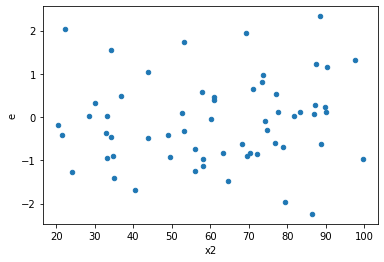

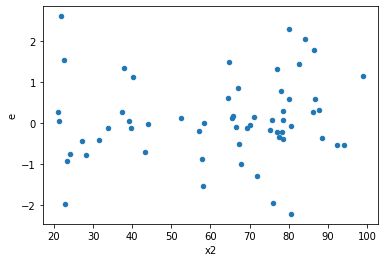

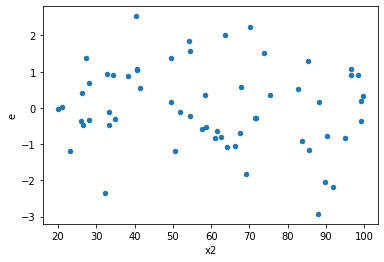

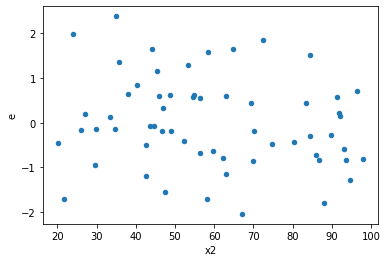

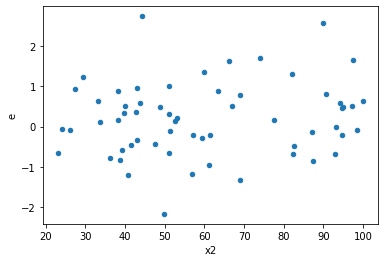

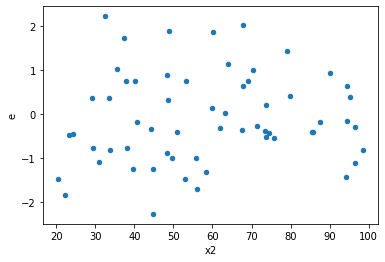

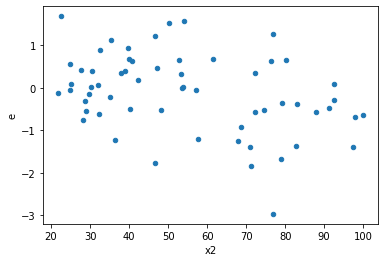

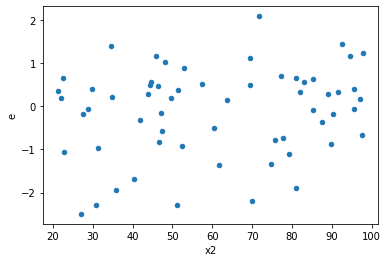

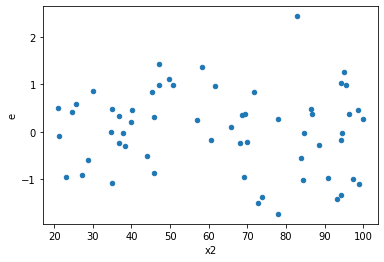

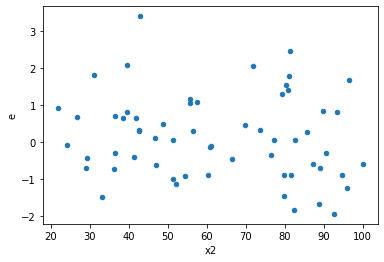

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,19.672044005394987,22.92560338412666,0.8941838184270449,1.0420728810966664,1.1653900010512073,0.7227977069180163,0.6386011465409919,0.36139885345900813,Reject005=1 : Homoscedasticity
3.0,22.0,22.0,14.244822995532402,21.64281235407066,0.6474919543423819,0.9837641979123027,1.5193458255577121,0.3338376833582588,0.8330811583208706,0.1669188416791294,Reject005=1 : Homoscedasticity
5.0,22.0,22.0,20.663948712388923,21.900794828871128,0.9392703960176783,0.9954906740395967,1.0598552645332817,0.8927833332389143,0.5536083333805428,0.4463916666194572,Reject005=1 : Homoscedasticity
6.0,22.0,22.0,11.75083998004572,18.080962842323807,0.5341290900020782,0.8218619473783548,1.5386953505474812,0.3195248585604906,0.8402375707197547,0.1597624292802453,Reject005=1 : Homoscedasticity
9.0,22.0,22.0,20.472547386095098,24.46739064147154,0.9305703357315953,1.112154120066888,1.1951317137060202,0.6795653574513989,0.6602173212743006,0.33978267872569945,Reject005=1 : Homoscedasticity
10.0,22.0,22.0,22.126417795161856,23.962326700981695,1.005746263416448,1.0891966682264407,1.0829736165526658,0.8533841664694102,0.5733079167652949,0.4266920832347051,Reject005=1 : Homoscedasticity
11.0,22.0,22.0,22.102710412487056,25.528967392187575,1.004668655113048,1.1604076087357988,1.1550152409256031,0.7383675795729188,0.6308162102135406,0.3691837897864594,Reject005=1 : Homoscedasticity
12.0,22.0,22.0,23.01985835827875,36.59960550475306,1.0463571981035795,1.66361843203423,1.5899144527790092,0.28442114753895953,0.8577894262305202,0.14221057376947976,Reject005=1 : Homoscedasticity
14.0,22.0,22.0,19.099026752130015,19.33715113503429,0.8681375796422734,0.8789614152288313,1.0124678804838951,0.97707939673111,0.511460301634445,0.488539698365555,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,19.672044005394987,22.92560338412666,0.8941838184270449,1.0420728810966664,1.1653900010512073,0.7227977069180163,Reject005=1 : Homoscedasticity
1.0,22.0,22.0,19.97304481763652,8.135764435037856,0.9078656735289328,0.3698074743199026,0.4073372141964977,0.040426034334409784,Reject005=0 : Heteroscedasticity
2.0,22.0,22.0,39.60987557643635,10.783665040821111,1.800448889838016,0.49016659276459595,0.2722468799481976,0.003493936263495525,Reject005=0 : Heteroscedasticity
3.0,22.0,22.0,14.244822995532402,21.64281235407066,0.6474919543423819,0.9837641979123027,1.5193458255577121,0.3338376833582588,Reject005=1 : Homoscedasticity
4.0,22.0,22.0,23.949611668303803,21.990729599680915,1.0886187121956274,0.9995786181673143,0.9182081907734906,0.8431787467179103,Reject005=1 : Homoscedasticity
5.0,22.0,22.0,20.663948712388923,21.900794828871128,0.9392703960176783,0.9954906740395967,1.0598552645332817,0.8927833332389143,Reject005=1 : Homoscedasticity
6.0,22.0,22.0,11.75083998004572,18.080962842323807,0.5341290900020782,0.8218619473783548,1.5386953505474812,0.3195248585604906,Reject005=1 : Homoscedasticity
7.0,22.0,22.0,14.962976544342991,7.377426977085926,0.680135297470136,0.3353375898675421,0.49304541480920033,0.10453278822798684,Reject005=1 : Homoscedasticity
8.0,22.0,22.0,22.00136581117222,19.933364977293085,1.00006208232601,0.9060620444224129,0.9060057974751271,0.8189981421250528,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      939
Reject005=0 : Heteroscedasticity     61
Name: Result_test, dtype: int64